# Analyzing NYC's Stormwater Flood Map - Extreme Flood Scenario
## Data Cleaning

Mark Bauer

In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import seaborn as sns
import matplotlib.pyplot as plt
import urllib.request
import zipfile 
import matplotlib.patches as mpatches
import contextily as ctx

plt.rcParams['savefig.facecolor'] = 'white'
%matplotlib inline

In [2]:
%reload_ext watermark
%watermark -v -p numpy,pandas,seaborn,matplotlib,geopandas

Python implementation: CPython
Python version       : 3.8.13
IPython version      : 8.4.0

numpy     : 1.22.4
pandas    : 1.4.2
seaborn   : 0.11.2
matplotlib: 3.5.2
geopandas : 0.9.0



In [3]:
# # url path from the web
# url = 'https://data.cityofnewyork.us/download/w8eg-8ha6/application%2Fzip'
# print('data url path:', url)

# # assigning file name as 'stormwater-data-nyc.zip''
# urllib.request.urlretrieve(url, 'stormwater-data-nyc.zip')

# listing files in our directory
print('listing the new downloaded file in our directory:')
%ls

listing the new downloaded file in our directory:
CONTRIBUTING.md                    data/
Data_Dictionary_ExtremeFlood.xlsx  data-cleaning.ipynb
LICENSE                            figures/
README.md                          stormwater-data-nyc/
analysis.ipynb                     stormwater-data-nyc.zip


In [4]:
# path = 'stormwater-data-nyc.zip'
# print('name of zip file:', path)

# # opening zip using 'with' keyword in read mode
# with zipfile.ZipFile(path, 'r') as file:
#     # extracing all items in our zipfile
#     # naming our file 'stormwater-data-nyc'
#     file.extractall('stormwater-data-nyc')

print('listing items after unzipping the file:\n')
%ls stormwater-data-nyc/    

listing items after unzipping the file:

NYC Stormwater Flood Map - Extreme Flood.gdb/


In [5]:
# # url path from the web
# url = 'https://data.cityofnewyork.us/api/views/w8eg-8ha6/files\
# /87be26cc-67b1-4cb0-895d-90a399c79557?download=true&filename=Data_Dictionary_ExtremeFlood.xlsx'
# print('data url path:', url)

# # assigning file name as 'Data_Dictionary_ExtremeFlood.xlsx'
# urllib.request.urlretrieve(url, 'Data_Dictionary_ExtremeFlood.xlsx')

# listing files in our directory
print('listing the new downloaded file in our directory:')
%ls

listing the new downloaded file in our directory:
CONTRIBUTING.md                    data/
Data_Dictionary_ExtremeFlood.xlsx  data-cleaning.ipynb
LICENSE                            figures/
README.md                          stormwater-data-nyc/
analysis.ipynb                     stormwater-data-nyc.zip


In [6]:
path = 'stormwater-data-nyc/NYC Stormwater Flood Map - Extreme Flood.gdb'
gdf = gpd.read_file(path)

print('shape of data: {}'.format(gdf.shape))
gdf.head()

shape of data: (3, 4)


,Flooding_Category,Shape_Length,Shape_Area,geometry
0,1,3.289858e+07,4.022472e+08,"MULTIPOLYGON Z (((917251.502 120925.181 0.000,..."
1,2,1.685940e+07,3.153255e+08,"MULTIPOLYGON Z (((917270.790 120873.747 0.000,..."
2,3,8.042453e+06,3.455846e+08,"MULTIPOLYGON Z (((915290.556 120269.389 0.000,..."


In [7]:
# summary of the data
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Flooding_Category  3 non-null      int64   
 1   Shape_Length       3 non-null      float64 
 2   Shape_Area         3 non-null      float64 
 3   geometry           3 non-null      geometry
dtypes: float64(2), geometry(1), int64(1)
memory usage: 224.0 bytes


In [8]:
gdf.crs

<Derived Projected CRS: EPSG:2263>
Name: NAD83 / New York Long Island (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: United States (USA) - New York - counties of Bronx; Kings; Nassau; New York; Queens; Richmond; Suffolk.
- bounds: (-74.26, 40.47, -71.8, 41.3)
Coordinate Operation:
- name: SPCS83 New York Long Island zone (US Survey feet)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

<AxesSubplot:>

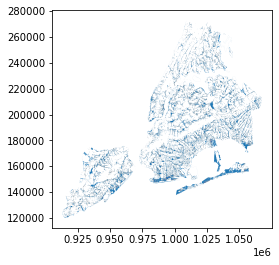

In [9]:
gdf.plot()

In [10]:
gdf.iloc[:, :-1].head()

,Flooding_Category,Shape_Length,Shape_Area
0,1,3.289858e+07,4.022472e+08
1,2,1.685940e+07,3.153255e+08
2,3,8.042453e+06,3.455846e+08


Flooding_Category	
Category of flooding classified by depth of ponding or tidal inundation from sea level rise

>1 - Nuisance Flooding (greater or equal to 4 in. and less than 1 ft.)  
2 - Deep and Contiguous Flooding (1 ft. and greater)  
3 - Future High Tides 2080

In [11]:
gdf['flood_classification'] = (
    gdf['Flooding_Category']
    .replace({1:'Nuisance Flooding',
              2:'Deep and Contiguous Flooding',
              3:'Future High Tides 2080'})
)

print('shape of data: {}'.format(gdf.shape))
gdf.head()

shape of data: (3, 5)


,Flooding_Category,Shape_Length,Shape_Area,geometry,flood_classification
0,1,3.289858e+07,4.022472e+08,"MULTIPOLYGON Z (((917251.502 120925.181 0.000,...",Nuisance Flooding
1,2,1.685940e+07,3.153255e+08,"MULTIPOLYGON Z (((917270.790 120873.747 0.000,...",Deep and Contiguous Flooding
2,3,8.042453e+06,3.455846e+08,"MULTIPOLYGON Z (((915290.556 120269.389 0.000,...",Future High Tides 2080


In [12]:
gdf['geometry'].geom_type

0    MultiPolygon
1    MultiPolygon
2    MultiPolygon
dtype: object

In [13]:
gdf = (
    gdf
    .explode()
    .reset_index(drop=True)
)

gdf['Shape_Area'] = gdf.area 
gdf['Shape_Length'] = gdf.length 

print('shape of data: {}'.format(gdf.shape))
gdf.head()

shape of data: (164033, 5)


,Flooding_Category,Shape_Length,Shape_Area,flood_classification,geometry
0,1,11.396709,1.521997,Nuisance Flooding,"POLYGON Z ((917251.502 120925.181 0.000, 91725..."
1,1,38.406428,82.627967,Nuisance Flooding,"POLYGON Z ((917309.366 120944.469 0.000, 91729..."
2,1,24.389695,14.028213,Nuisance Flooding,"POLYGON Z ((917311.973 120963.757 0.000, 91730..."
3,1,198.696536,820.105280,Nuisance Flooding,"POLYGON Z ((917248.402 120964.877 0.000, 91725..."
4,1,50.837975,152.514946,Nuisance Flooding,"POLYGON Z ((917168.151 120963.757 0.000, 91715..."


In [14]:
(gdf
 .groupby(by='flood_classification')[['flood_classification']]
 .count()
 .rename(columns={'flood_classification':'count_polygons'})
)

,count_polygons
flood_classification,
Deep and Contiguous Flooding,53057
Future High Tides 2080,7121
Nuisance Flooding,103855


In [15]:
acres_conversion = 43560

(gdf
 .groupby(by='flood_classification')[['Shape_Area']]
 .sum()
 .div(acres_conversion)
 .round(0)
 .rename(columns={'Shape_Area':'shape_area_acres'})
)

,shape_area_acres
flood_classification,
Deep and Contiguous Flooding,8430.0
Future High Tides 2080,7934.0
Nuisance Flooding,9936.0


In [16]:
gdf.to_file(
    'data/stormwater-data.gpkg',
    driver='GPKG',
    layer='name',
    index=False
)

In [17]:
ls data/

stormwater-data.gpkg  stormwater-data.zip


In [18]:
!zip data/stormwater-data.zip data/stormwater-data.gpkg

updating: data/stormwater-data.gpkg (deflated 62%)


In [19]:
ls data/

stormwater-data.gpkg  stormwater-data.zip


In [20]:
!rm data/stormwater-data.gpkg

In [21]:
ls data/

stormwater-data.zip
